### plot stacked results individually (to check before combining)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import pandas as pd
from scipy.interpolate import interp1d

%matplotlib inline

In [16]:
source = 'DFTau'
PA1 = 138
PA2 = PA1 + 180
trans = 'highJ'
dates = ['191008', '200221']

In [17]:
def read_stacked(file):
    df = pd.read_csv(file, comment='#')
    df.columns = df.columns.str.replace(' ', '')
    
    fix_columns = ['flux', 'err_flux', 'SA', 'err_SA']
    for c in fix_columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')
    
    return df

In [18]:
def plot_flux_SA(df):
    v = df['Vhelio']
    flux = df['flux']
    err_flux = df['err_flux']
    SA = df['SA']
    err_SA = df['err_SA']

    fig = plt.figure(figsize=(10, 7))    
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0., hspace=0.07)
    ax1 = fig.add_subplot(211)
    ax1.plot(v, flux, color='mediumblue', lw=2)
    ax1.fill_between(v, flux-err_flux, flux+err_flux, color='mediumblue', alpha=0.3)
    
    ax2 = fig.add_subplot(212)
    ax2.scatter(v, SA, color='k', s=5)
    ax2.errorbar(v, SA, err_SA, color='k', alpha=0.8, lw=0.5, capsize=2, linestyle=' ')
    ax2.axhline(0, color='purple', ls = '--', lw=2, zorder=0, alpha=0.7)
    
    for ax in [ax1,ax2]:
        ax.set_xlim(-70, 100)
        index_xticks = 25
        ax.xaxis.set_major_locator(MultipleLocator(index_xticks))
        ax.xaxis.set_minor_locator(MultipleLocator(index_xticks/5))
        ax.tick_params(which='major',axis='both',right=True,top=True, labelsize=15, pad=7, width=2.5, length=6,direction='in',color='k')
        ax.tick_params(which='minor',axis='both',right=True,top=True, labelsize=15, pad=7, width=2, length=3,direction='in',color='k')
        
    ax1.set_ylim(0.9, 1.4)
    index_yticks1 = 0.1 
    ax1.yaxis.set_major_locator(MultipleLocator(index_yticks1))
    ax1.yaxis.set_minor_locator(MultipleLocator(index_yticks1/4))
    
    ax2.set_ylim(-20, 20)
    index_yticks2 = 5
    ax2.yaxis.set_major_locator(MultipleLocator(index_yticks2))
    ax2.yaxis.set_minor_locator(MultipleLocator(index_yticks2/4))
    
    ax1.set_xticklabels([])
    ax2.set_xlabel('Heliocentric velocity (km/s)', labelpad=10, fontsize=20)
    ax1.set_ylabel('Normalized flux', labelpad=10, fontsize=20)
    ax2.set_ylabel('SA (mas)', labelpad=10, fontsize=20)
    
    for side in ax1.spines.keys():  # 'top'
            ax1.spines[side].set_linewidth(2)
    for side in ax2.spines.keys():  # 'top'
            ax2.spines[side].set_linewidth(2)
            
    plt.suptitle(f'{source} {date} {trans}', fontsize=20, fontweight='bold')
    plt.savefig(f'{source}_stacked_{date}_PA{PA1}_{PA2}_{trans}.png', bbox_inches='tight')
    
    return

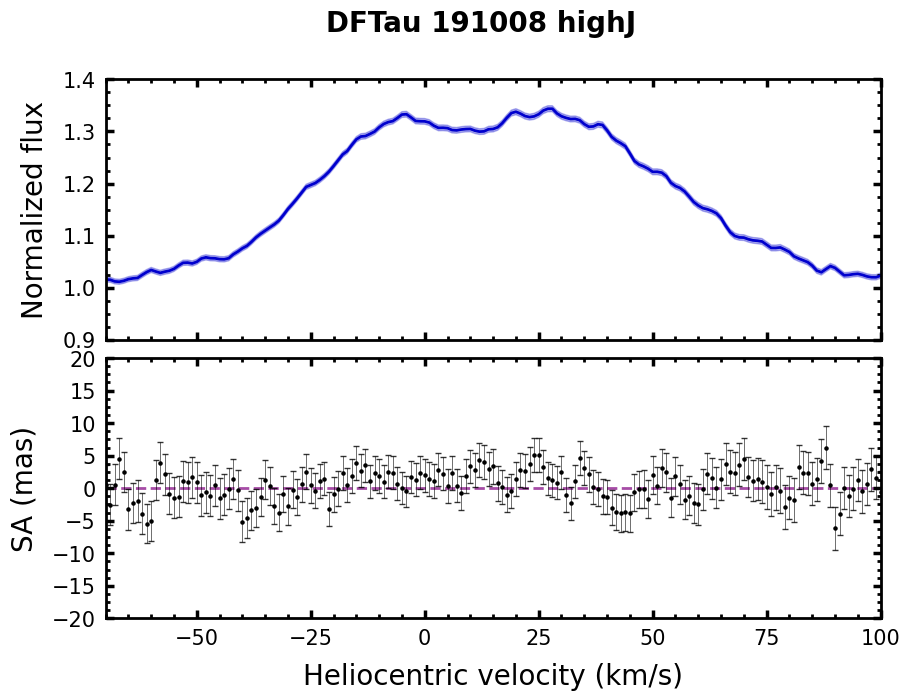

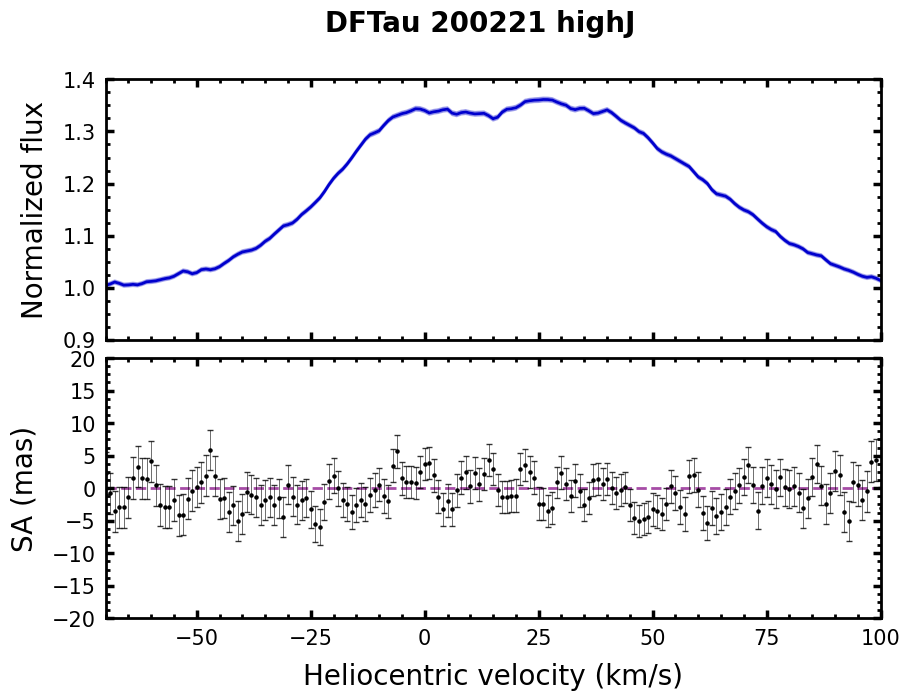

In [19]:
for date in dates:
    file = str(f'{source}_stacked_{date}_PA{PA1}_{PA2}_{trans}.csv')
    df = read_stacked(file)
    plot_flux_SA(df)